<a href="https://colab.research.google.com/github/IthaRamSaiManoj/DEMD_git_Practice/blob/main/mnist_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Without Dropout

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical

ImportError: ignored

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


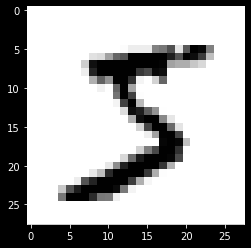

In [ ]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

There is a little preprocessing that we must perform beforehand. We normalize the pixels (features) such that they range from 0 to 1. This will enable the model to converge towards a solution that much faster. Next, we transform each of the target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3.

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Before feeding a 2 dimensional matrix into a neural network, we use a flatten layer which transforms it into a 1 dimensional array by appending each subsequent row to the one that preceded it. We’re going to be using two hidden layers consisting of 128 neurons each and an output layer consisting of 10 neurons, each for one of the 10 possible digits. The softmax activation function will return the probability that a sample represents a given digit.

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.2736 - accuracy: 0.9192 - val_loss: 0.1201 - val_accuracy: 0.9653
Epoch 2/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.1086 - accuracy: 0.9658 - val_loss: 0.0956 - val_accuracy: 0.9728
Epoch 3/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0913 - val_accuracy: 0.9723
Epoch 4/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0871 - val_accuracy: 0.9740
Epoch 5/10
54000/54000 [==============================] - 5s 88us/step - loss: 0.0421 - accuracy: 0.9861 - val_loss: 0.0915 - val_accuracy: 0.9748
Epoch 6/10
54000/54000 [==============================] - 5s 88us/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.0839 - val_accuracy: 0.9785
Epoch 7/10
54000/54000 [==============================] - 5s 88us/st

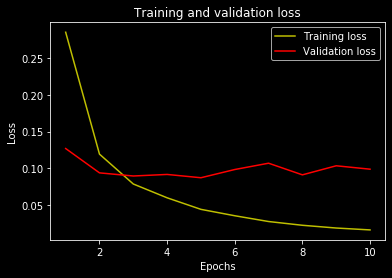

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Without dropout, the validation loss stops decreasing after the third epoch.

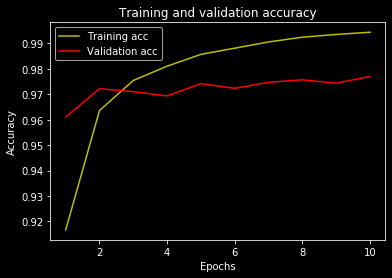

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Without dropout, the validation accuracy tends to plateau around the third epoch.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 0s 44us/step


0.975600004196167

## Dropout

In [ ]:
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28, 28)))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))
model_dropout.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_19 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_20 (Activation)   (None, 128)              

In [ ]:
model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 159us/step - loss: 0.5327 - accuracy: 0.8396 - val_loss: 0.1590 - val_accuracy: 0.9527
Epoch 2/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.2885 - accuracy: 0.9158 - val_loss: 0.1190 - val_accuracy: 0.9643
Epoch 3/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.2379 - accuracy: 0.9308 - val_loss: 0.1011 - val_accuracy: 0.9705
Epoch 4/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.2104 - accuracy: 0.9380 - val_loss: 0.0932 - val_accuracy: 0.9730
Epoch 5/10
54000/54000 [==============================] - 9s 169us/step - loss: 0.1870 - accuracy: 0.9454 - val_loss: 0.0892 - val_accuracy: 0.9712
Epoch 6/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.1776 - accuracy: 0.9475 - val_loss: 0.0852 - val_accuracy: 0.9747
Epoch 7/10
54000/54000 [==============================] - 9s 17

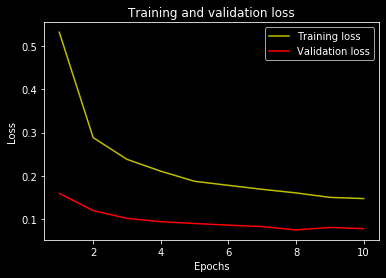

In [ ]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the validation loss is significantly lower than that obtained using the regular model.

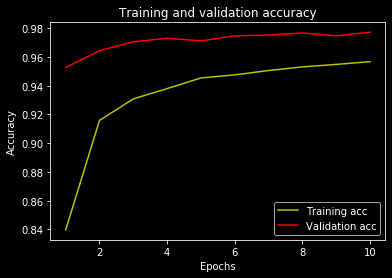

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As you can see, the model converged much faster and obtained an accuracy of close to 98% on the validation set, whereas the previous model plateaued around the third epoch.

The accuracy obtained on the testing set isn’t very different than the one obtained from the model without dropout. This is in all likelihood due to the limited number of samples.

In [ ]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
test_acc

10000/10000 [==============================] - 1s 50us/step


0.9722999930381775

Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.